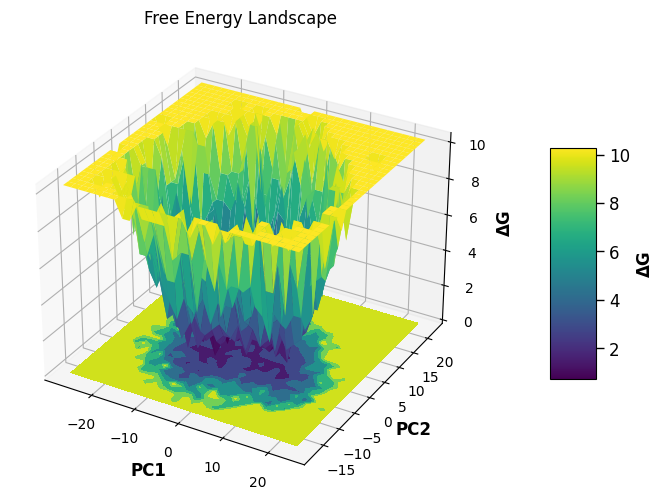

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from the file
data = np.loadtxt('free-energy-landscape.txt')

# Extract columns
PC1 = data[:, 0]
PC2 = data[:, 1]
deltaG = data[:, 2]

# Reshape data for surface plot
unique_PC1 = np.unique(PC1)
unique_PC2 = np.unique(PC2)
PC1_grid, PC2_grid = np.meshgrid(unique_PC1, unique_PC2)
deltaG_grid = deltaG.reshape((len(unique_PC2), len(unique_PC1)))

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
surf = ax.plot_surface(PC1_grid, PC2_grid, deltaG_grid, cmap='viridis', edgecolor='none')
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='ΔG', pad=0.1,)
ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.set_zlabel('ΔG', rotation=90, labelpad=5, fontsize=12, fontweight='bold')
ax.set_title('Free Energy Landscape')

# Add 2D contour plot to the XY plane
contour = ax.contourf(PC1_grid, PC2_grid, deltaG_grid, zdir='z', offset=np.min(deltaG_grid), cmap='viridis')

# Modify x, y, z tick label properties
ax.tick_params(axis='both', which='major', labelsize=10, width=1, length=6, direction='out')

# Modify colorbar label properties
cbar.set_label('ΔG', fontsize=12, fontweight='bold')

# Modify colorbar tick label properties
cbar.ax.tick_params(axis='both', which='major', labelsize=12, width=1, length=6, direction='out')

# Save the plot as TIFF with 300 dpi
plt.savefig('free_energy_landscape.tiff', dpi=300)

plt.show()
